In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import Classes1 as cl 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\KodluyoruzBootcamp\Ödevler Ve Çalışmalar\hmelq.csv")

In [4]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


* bad = 1: temerrüte düsme yani borcu odememe durumu. 0: odeme yapilmis
* loan = talep edilen kredi miktari
* mortdue = mevcut Mortgage borclari
* value = guncel mal-mulk degeri
* reason = DebtCon: kısa süreli borçların uzun süreli ya da süresiz borca dönüştürülmesi(borclarin birlestirilmesi), Homelmp: evin dekorasyonu vb sebepten istenme durumu
* job = meslek durumu
* yoj = mevcut iste gecirilen yil
* derog = baslica ihlal edici, uygunsuz davranis raporlarinin sayisi
* delinq = odenmemis kredi kredi limitinin sayisi
* clage = aylarin icerisindeki en eski kredi limitinin yasi
* ninq = güncel,son kredi sorgusunun sayisi
* clno = kredi limit sayisi 
* debtinc = borc gelir orani

In [5]:
data_information = cl.information(df)

In [6]:
data_information.info_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB
None 
Boyut Bilgisi:
 (3576, 13)


In [7]:
data_information.summary_statistics()

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [8]:
data_information.nuniques()

bad           2
loan        474
mortdue    3095
value      3302
reason        2
job           6
yoj          86
derog        11
delinq       12
clage      3050
ninq         15
clno         61
debtinc    2653
dtype: int64

In [9]:
data_information.value_count("reason","job")

First Variable Value Counts:
 DebtCon    2371
HomeImp    1058
Name: reason, dtype: int64 
Second Variable Value Counts:
 Other     1431
ProfEx     767
Office     569
Mgr        461
Self       115
Sales       66
Name: job, dtype: int64


In [10]:
data_information.MissingValues()

,Missing_Values,Missing_values_rate %
bad,0,0.000000
loan,0,0.000000
mortdue,314,8.780761
value,64,1.789709
reason,147,4.110738
job,167,4.670022
yoj,312,8.724832
derog,427,11.940716
delinq,351,9.815436
clage,179,5.005593


* Gorsellere gecmeden once su sonuclardan yola cikarak bazi yorumlari yapmak lazim;                                                                   veri setimizi buradaki sonuclari gibi arka plan bulundugu sektorle ilgili bilgileri de edinmek ve ogrenmek gerekiyor. Bu isin ne kadar istatistik ve kod yazimi boyutu onemli ise ayni sekilde domain bilgisi de bu denli onemlidir ve eksik olundu taktir de istenilen noktaya varilmakta zorluk cekilmektedir. 

* Data genel olarak finansal yonlu bir veri setidir. 3576 gozlemden olusan 13 adet de degiskeni vardir. Degiskenlerin hepsinin veri seti icerisinde bir yeri bulunmakta tabi ki bu onemine goredir. Burada Target yani bagimli degisken olarak ise BAD adli degisken gosterilmistir. Sebebi ise incelenen durumun yada tahminlenmesi yapilmak istenen durumun gelecekte kisinin temerrüte dusup dusmeyecegini tahminlemek ve buna gore musterilere kisilere karsi bir aksiyon hareketi almaktir. 

* Bu hareketin temel amaci tabi ki kar amaci gutmektir. Diger degiskenlerimize de sirasiyla bakiyoruz. Toplam da 2 adet object(kategorik) ve 11 adet de numeric degiskenimiz bulunmakta. Bu 2 adet kategorik degiskenlerimiz ayni zamanda nominal olcumludur. 

* Daha sonra devam edip numeric degiskenlerin istatistiksel ozetlerini goruyoruz. Burada mean, median, std gibi istastistiki hesap degeleri bulunmakta. Su unutulmamalidir ki bu sonuclar degiskenler hakkinda onemli bilgi tasimaktatir ve isleyen algoritmalarin formullerin arka planini olusturmaktadir. Bad degiskenimiz aslinda kategorik bir degisken olup binary(1,0) sekilde kodlanmistir bu ayni zamanda algoritmalarin istedigi bir durumdur. Genel olarak Mean bakarken bazi yerler de min ve max degerlerine bakip ona gore Median tercih edilmelidir. Bunun olayi ise gercek ortalama hakkinda daha gercekci bilgi vermesidir.

* Ardindan degiskenlerimize ait Unique degerleri goruyoruz. Yani degiskenimizin kac siniftan olustuguna eristik demektir. Bunun onemi kategorik degiskenler acisindan daha kiymetlidir. Bize kategorik degiskenimizin icerisinde bulunan siniflar hakkin bilgi verir ve onlarin onemini daha sonradan degerlendirmeye aliriz.

* Bu adimdan sonra da Value Counts yapiyoruz ve degiskenlerimizin degerlerini saydiriyoruz. Bunu Object tipindeki degiskenlere kullanmak daha mantikli olacaktir. Numeric tipteki degiskenler zaten sinif ozelligi tasimadigindan bize kategorik tipdeki degiskenlerimizin hakkin da daha cok bilgi vermektedir. 

* Son olarak cok onemli bir bilgiye daha deginiyoruz. Eksik gozlem, degiskenlere gore eksik gozlemlere ve onlarin oranini soyle bir goruyoruz. Bu bizim icin cok dikkat edilmesi gereken durumlardan biridir. Eksik gozlemler tahminlerimiz de sikinti cikartan ve doldurulma islemi yapilirken cok dikkat edilmesi gereken bir durumdur. Yapisal olup olmamasi ve doldururken nelerin kullanilmasi gerektigi gibi durumlara dikkat etmemiz gerekir. Yoksa yanli sonuclar almamiz muhtemeldir. Tabi her zaman bu eksik degerler doldurulmaz, bazi durumlar da beklenin cok ustunde eksik deger versa bunlari sileriz.

In [11]:
data_visualization = cl.Visualization(df)

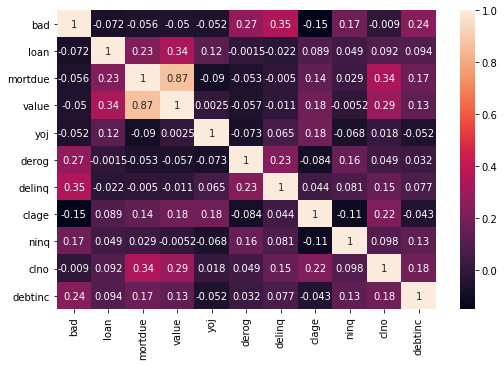

In [12]:
data_visualization.corr_map()

* Burada yaptigimiz islemde kisaca bir korelasyon haritasi cikardik. Korelasyon haritasi bizim icin buyuk onem tasimaktadir. Sebebi ise modelleme yapacagimiz zaman bagimli degiskenimiz ile ilisigi yakin olan degiskenleri burada gormek bizim icin bir infirmation(yani bilgidir). Ayni zaman da bazi modeller dogrusal baglanti isteyemeyebiliyor onun icin degiskenler arasindaki iliski hakkinda bilgili olmakta onemli.

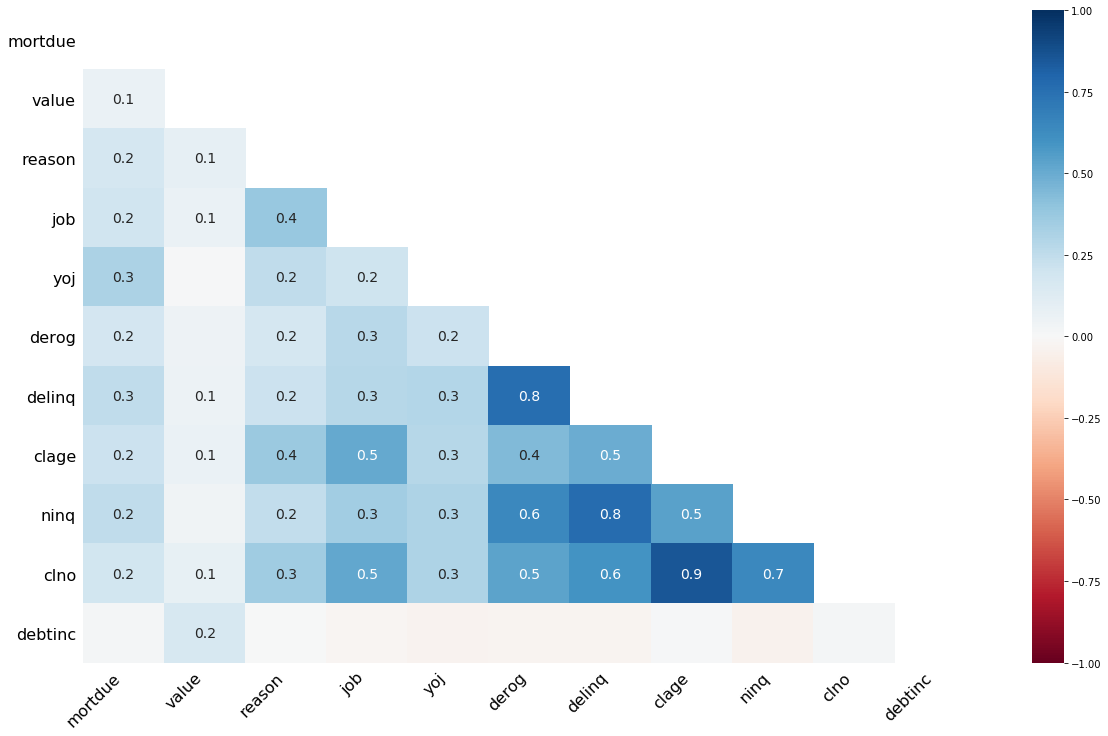

In [13]:
data_visualization.missingvalues_heat_map()

* Daha sonra kayip degerler icin kritik olan bir tabloyu ortaya cikardik. Burada da bir korelasyon durumu var. Soyle ki aralarinda iliskisi yuksek olan degiskenlerin eksik deger durumu yapisaldir. Bu kritik bir durumdur. Herhangi bir doldurma yapmadan once yapisallik sorunu giderilmelidir. Aksi takdir yapisallik problemi eksik degeleri doldururken ilerleyen surecler de yanli sonuc almamiza sebep olacaktir.

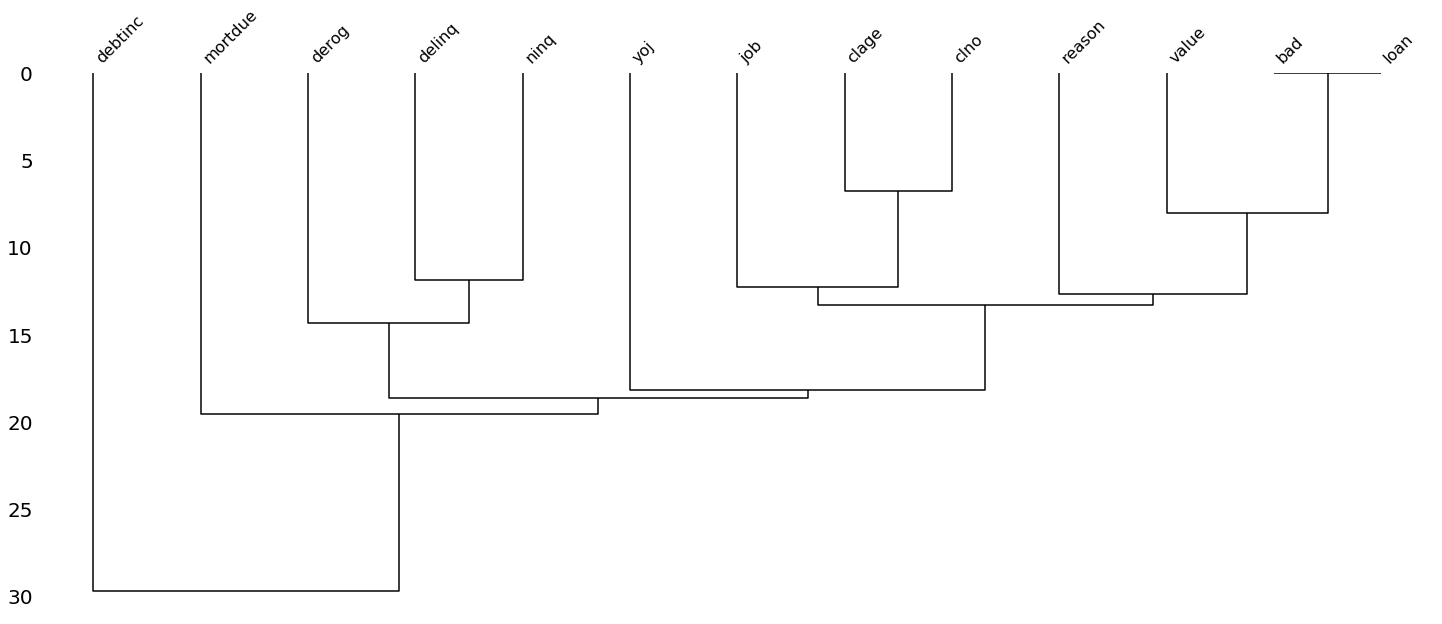

In [14]:
data_visualization.missingvalues_dendogram()

* Eksik degerlerin hangilerinin birlikte kumelendigini gormek adina dendograma da bakabiliriz.

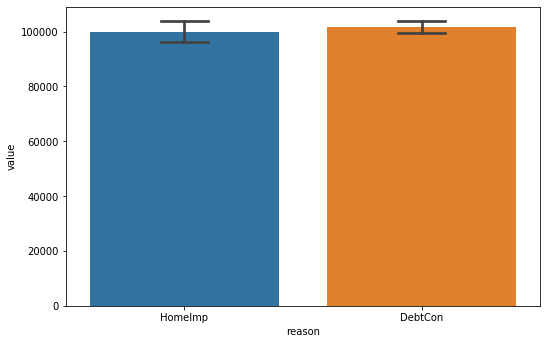

In [15]:
data_visualization.bar("reason","value")

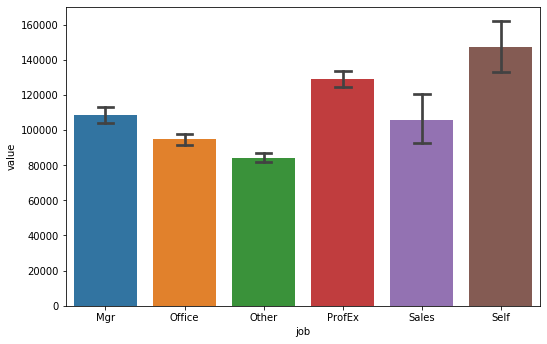

In [16]:
data_visualization.bar("job","value")

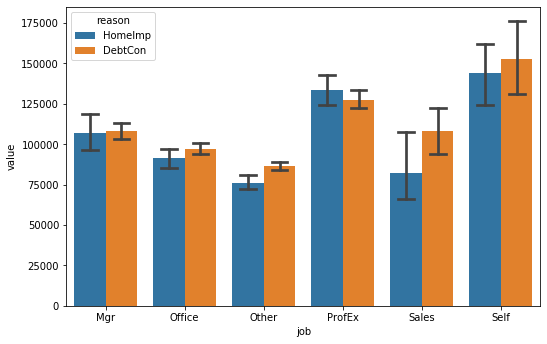

In [17]:
data_visualization.bar("job","value","reason")

* Buradaki islemlerimiz de ise kategorik degiskenlerin yanlarinda numeric degiskenlerle birlikte sikligina baktik. Daha sonra birde bir kategorik degisken kirilimin da daha inceledik bu bize arka planda olanlari anlamamız acisindan daha yardimci olacak durumlardan biridir. 

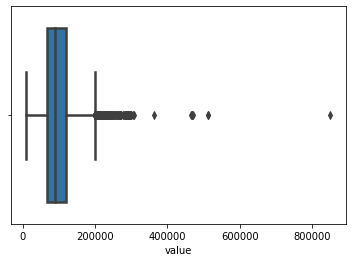

In [18]:
data_visualization.boxplot("value")

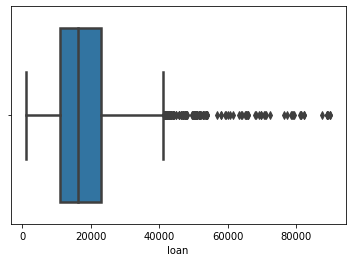

In [19]:
data_visualization.boxplot("loan")

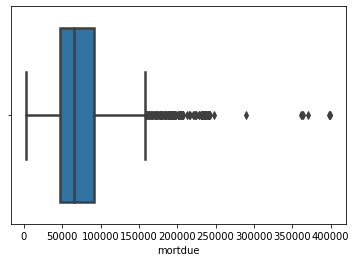

In [20]:
data_visualization.boxplot("mortdue")

* Bir kritik noktaya daha deginmis bulunuyoruz. Boxplotlar bizim icin ciddi onem tasir sebebi ise outlier degerleri gormemiz de oynadigi roldur. Gorseller de numeric degiskenlere ait outlier degiskenler goruyoruz. Bazi makine ogrenmesi yontemleri bunlara duyarlidir ve yanli sonuclar vermesine sebep olur ayni zamanda ortalamamizi yukari ceker ve genelleme yapmamizi engellerler.

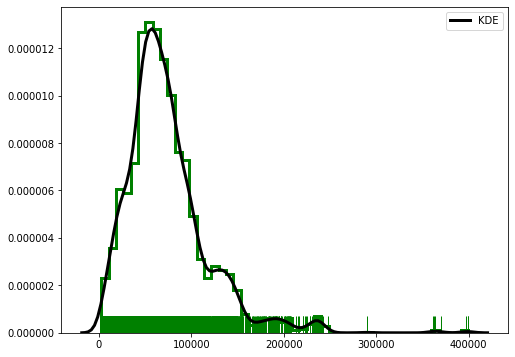

In [21]:
data_visualization.hist("mortdue")

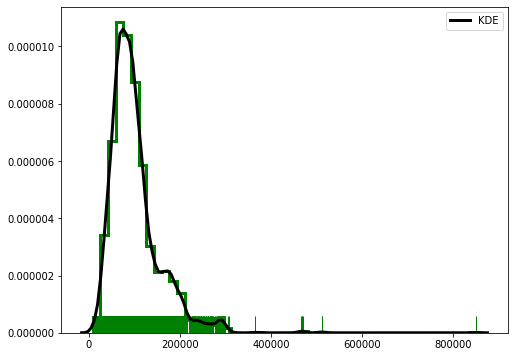

In [22]:
data_visualization.hist("value")

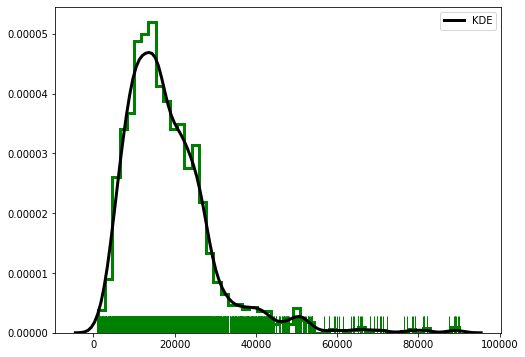

In [23]:
data_visualization.hist("loan")

* 3 adet numeric degiskenmizi histogram yogunluk grafigi ile birlikte ele aldik. Y eksenin de frekanslarin standartlastirilmis hali var iken X eksenin de ise degiskenlere ait degerlerin baslangic ve bitis kisimlarini goruyoruz. Buradan carpiklik basiklik ortalama gibi dagilimin nasil yayildigi gibi sonculari gormemizi sagliyor. 

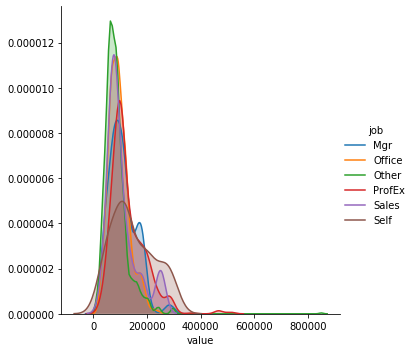

In [24]:
data_visualization.hist1("value","job")

* Evet yogunluk grafigini gormustuk ama asil olayin bunun arkasindaki kirilim oldugunu unutmamak gerekli. Baktigimiz zaman aslinda yogunlugu olsuturan siniflarin hangilerini oldugunu gorebiliyoruz. Ayni zaman siniflarin numeric degiskene gore dagilimi hakkinda da guzel bir bilgi edine biliyoruz

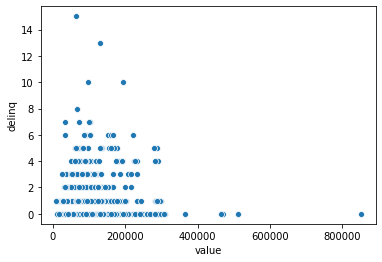

In [25]:
data_visualization.scatter("value","delinq")

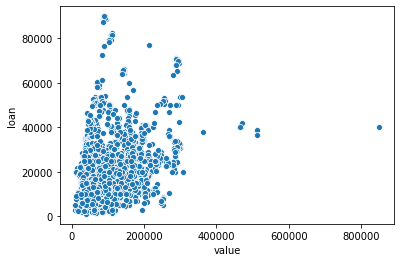

In [26]:
data_visualization.scatter("value","loan")

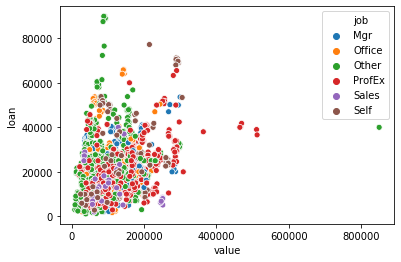

In [27]:
data_visualization.scatter("value","loan","job")

* Son olarak degiskenler arasindaki iliskileri Scatter plot ile inceledik ve boylelikle degiskenlerin birbirileri ile iliskisi hakkinda gozle gorulur sonculari elde ettik. Son grafikte ayni zamanda bu iliskinin kategorik degisken kiriliminda nasil dagildigini da gorebiliyoruz.

## BAD degiskenin borcunu odedi ve odemedi olarak degistirelim

In [28]:
a = df["bad"] == 0 
df["bad"][a] = "borcunu_odedi"

b = df["bad"] == 1 
df["bad"][b] = "borcunu_odemedi"

df = df.astype({"bad":object})


In [29]:
df.dtypes[0:1]

bad    object
dtype: object

## Istatistiki Testlerimize Gecelim

### Job degiskenin siniflarina gore talep ettikleri kredi miktari arasinda anlamli bir farklilik var midir?

In [30]:
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

In [31]:
from scipy import stats
#>>
df.dropna(inplace=True)

#>>
df1 = df[["loan","job"]]

#>>
group = pd.unique(df1.job.values)

#>>
d_v1 = {grp:df1["loan"][df1.job == grp] for grp in group}

#>>
f, p = stats.f_oneway(d_v1['Mgr'],d_v1['Office'],d_v1['Other'],d_v1['ProfEx'],d_v1['Sales'],d_v1['Self'])


In [32]:
stats.levene(d_v1['Mgr'],d_v1['Office'],d_v1['Other'],d_v1['ProfEx'],d_v1['Sales'],d_v1['Self'])

LeveneResult(statistic=9.865970425114181, pvalue=2.4716559692718906e-09)

In [33]:
from scipy.stats import shapiro
print("meg sinifi p-value:",shapiro(d_v1['Mgr'])[1])
print("Office sinifi p-value:",shapiro(d_v1['Office'])[1])
print("Other sinifi p-value:",shapiro(d_v1['Other'])[1])
print("ProfEx sinifi p-value:",shapiro(d_v1['ProfEx'])[1])
print("Sales sinifi p-value:",shapiro(d_v1['Sales'])[1])
print("Self sinifi p-value:",shapiro(d_v1['Self'])[1])


meg sinifi p-value: 1.9341280221851775e-06
Office sinifi p-value: 2.6599411082146163e-20
Other sinifi p-value: 6.706212903856413e-32
ProfEx sinifi p-value: 2.4288360595491314e-15
Sales sinifi p-value: 0.00980952475219965
Self sinifi p-value: 8.54066020110622e-05


In [34]:
f, p

(24.265429258068746, 8.750708412782003e-24)

In [35]:
f, p = stats.kruskal(d_v1['Mgr'],d_v1['Office'],d_v1['Other'],d_v1['ProfEx'],d_v1['Sales'],d_v1['Self'])

In [36]:
f, p

(89.18891986046953, 9.946764248161966e-18)

### Sonuca gore sinfilarin degerleri normal dagilmiyor, varyanslar homejen degildir. Normalde bu durumda non parametrik karsiligini yapmamiz lazim biz ikisinide yaptik ve elde ettigimiz sonuclara gore JOB degiskenin sifinlari arasinda kredi talep miktarlari acisindan istatistiksel olarak anlamli bir farklilik vardir. 

## Bagimsiz iki orneklem T testi yapalim

In [37]:
df1 = df[["value","bad"]]

group = pd.unique(df1.bad.values)

d_v1 = {grp:df1["value"][df1.bad == grp] for grp in group}

In [38]:
print("borcunu_odedi sinifi p-value:",shapiro(d_v1['borcunu_odedi'])[1])
print("borcunu_odemedi sinifi p-value:",shapiro(d_v1['borcunu_odemedi'])[1])

borcunu_odedi sinifi p-value: 5.560680210281526e-38
borcunu_odemedi sinifi p-value: 1.3988843091622356e-16


In [39]:
stats.levene(d_v1['borcunu_odedi'],d_v1['borcunu_odemedi'])

LeveneResult(statistic=3.9912413972700382, pvalue=0.0458714974437462)

In [40]:
stats.ttest_ind(d_v1['borcunu_odedi'],d_v1['borcunu_odemedi'],equal_var=False)

Ttest_indResult(statistic=1.1223807598767526, pvalue=0.26306533335850973)

### Sonuclari sirasiyla yorumladigimiz zaman sunu goruyoruz siniflarin degerleri normal dagilmiyor ve varyanslari homojen degildir. Bu durumda Equal varyansi False yapiyoruz. Elde ettigimiz sonuca gore H0 red edilemez. Temerrüte dusen ve dusmeyen musterilerin malk varliklari arasinda istatistiksel olarak anlamli bir sonuc bulunamamistir.

## Tum istatistiki ve Gorsellestirme Islemlerini gerceklestirdik Simdi sirada Lojistik Regresyon ile siniflandirma kismini halledecegiz

In [41]:
df1 = df

In [42]:
df1 = df1.dropna()

In [43]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

df1["bad"] = lbe.fit_transform(df1["bad"])
df1["reason"] = lbe.fit_transform(df1["reason"])


In [44]:
df1  = pd.get_dummies(df1,columns= ["job"], prefix= ["job"])

In [45]:
df1

,bad,loan,mortdue,value,reason,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,0
155,0,34100,241931.0,36486.0,0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,0
156,0,8400,62989.0,76718.0,1,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,1,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,0,0,0,0,1
3546,1,53400,228236.0,305514.0,1,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,0,0,0,0,1
3547,1,27300,106221.0,137727.0,0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,0,0,0,0,0,1
3548,1,37300,68789.0,86172.0,1,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,0,0,0,0,1


### Degisken donusumlerini gerceklestirdik simdi islemlere gecebiliriz. Degisken donusumu algoritmalarin bizden bekledigi bir durum kategorik degiskenler algoritmalar acisindan problem olusturmaktaydi.

In [46]:
from Classes1 import Methods
from sklearn.model_selection import train_test_split

y = df1["bad"]
X = df1.drop(["bad"],axis=1)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)

Results = Methods()

In [48]:
Results.LogitReg(X_train, y_train, X_test, y_test)

Optimization terminated successfully.
         Current function value: 0.236872
         Iterations 8


Please enter any method for solver:  liblinear


OLS Results: 
                            Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 1513
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                           16
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.2280
Time:                        17:58:20   Log-Likelihood:                -358.39
converged:                       True   LL-Null:                       -464.26
Covariance Type:            nonrobust   LLR p-value:                 3.330e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.145e-05   1.19e-05     -1.798      0.072   -4.48e-05    1.94e-06
mortdue    -1.908e-06   4.94e-06     -0.386      0.700   -1.16e-05    7.78e-06
value       4.175e-06   4.22e-06     

### Sonuclara gectigimiz zaman sunu goruyoruz Modelimiz genel olarak anlamli ve bazi degiskenlerimiz ise anlamsiz simdi bu degiskenlerden en yuksek olani atarak devam edecegiz ve tekrar sonuclara bakacagiz.

In [49]:
df1 = df1.drop("mortdue",axis=1)
df1

,bad,loan,value,reason,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,136877.0,0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,0
154,0,21700,96784.0,0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,0
155,0,34100,36486.0,0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,0
156,0,8400,76718.0,1,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,0,17400,43684.0,0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,39660.0,1,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,0,0,0,0,1
3546,1,53400,305514.0,1,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,0,0,0,0,1
3547,1,27300,137727.0,0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,0,0,0,0,0,1
3548,1,37300,86172.0,1,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,0,0,0,0,1


In [50]:
y = df1["bad"]
X = df1.drop(["bad"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)

Results = Methods()

Results.LogitReg(X_train, y_train, X_test, y_test)

Optimization terminated successfully.
         Current function value: 0.236923
         Iterations 8


Please enter any method for solver:  liblinear


OLS Results: 
                            Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 1513
Model:                          Logit   Df Residuals:                     1497
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.2279
Time:                        18:00:02   Log-Likelihood:                -358.46
converged:                       True   LL-Null:                       -464.26
Covariance Type:            nonrobust   LLR p-value:                 9.326e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.084e-05   1.18e-05     -1.769      0.077   -4.39e-05    2.26e-06
value       2.785e-06   2.13e-06      1.305      0.192    -1.4e-06    6.97e-06
reason        -0.1542      0.233     

### Sonuc olarak bazi degiskenlerin p value degerleri cok az sekilde yukselirken bazilari da yine cok az sekilde dustugunu goruyoruz yine en yuksek anlamsizligi olusturani atalim

In [51]:
df1 = df1.drop("reason",axis=1)

y = df1["bad"]
X = df1.drop(["bad"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)

Results = Methods()

Results.LogitReg(X_train, y_train, X_test, y_test)


Optimization terminated successfully.
         Current function value: 0.237069
         Iterations 8


Please enter any method for solver:  liblinear


OLS Results: 
                            Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 1513
Model:                          Logit   Df Residuals:                     1498
Method:                           MLE   Df Model:                           14
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.2274
Time:                        18:00:08   Log-Likelihood:                -358.69
converged:                       True   LL-Null:                       -464.26
Covariance Type:            nonrobust   LLR p-value:                 2.890e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -1.982e-05   1.15e-05     -1.717      0.086   -4.25e-05    2.81e-06
value       2.693e-06   2.12e-06      1.268      0.205   -1.47e-06    6.86e-06
yoj           -0.0156      0.015     

### Sonucu tekrar yorumladigimiz zaman R kare de cok dusuk bir deger ile dusus gozukuyorken degiskenlerden cogusunun p value degerleri dusuk bir oranda duserken 2 tanesinin ise yine cok az bir sekilde yukseldigi gozukmekte. Simdi tum degiskenleri kullanarak Hata METRIKLERINE bakalim

this func shows us Acuary value for both train and test set
Then Same kind Confusion Matirx and result details
We will see Cross_val values each sets
At the end we'll see  ROC CURVE with made of TRAIN set  


Please enter any method for solver:  liblinear


Accuary :  0.9207920792079208
-------------------
Confusion Matrix: 
 [[465   1]
 [ 39   0]]
-------------------
Details: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.88       505

-------------------
Cross Validaiton About TRAIN and TEST set: 
 0.9054810038340886  
 0.91878431372549
-------------------
ROC CURVE: 
 (<Figure size 432x288 with 1 Axes>,)


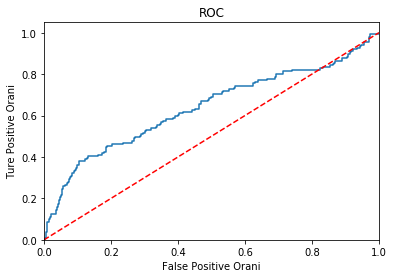

In [52]:
Results.LojPredict(X_train, y_train, X_test, y_test)

* Buradaki sonuclari gorunce sunu anlayabiliyoruz bizim modelimizin Accuarcy degeri ne kadar yuksek olsa da 1 olanlari tahmin etme durumu malesef ki yok dene bilecek kadar az iste bunun sebebi ise su:

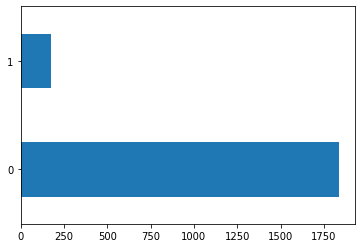

In [53]:
df1["bad"].value_counts().plot.barh();

* Dengesiz bir veri seti ile calisiyoruz ve boyle sonuclar almamiz ise gayet normal. Bu durumu halletmek icin daha cok 1 olan girisli veriler uretilebilir ama buda kesin ve her zaman olumlu bir sonuc degildir. Bunun yerine 1 durumunu aciklayan daha cok degisken olmasi aciklayicilik kismindan etkili degisken olmasi daha onemlidir.

* Bu durumu bir nebze iyi etmek adina TRESHOLD degerini dusurebiliriz simdi ona bakacagiz.

In [54]:
Results.LogitSelf(X_train, y_train, X_test, y_test)

This func job is if you given a TRESHOLD value it will use that and shows new results



Please enter any method for solver:  liblinear
Please enter TRESHOLD value:  0.3


Accuary :  0.9008592200925314
-------------------
Confusion Matrix: 
 [[1348   26]
 [ 124   15]]
-------------------
Details: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1374
           1       0.37      0.11      0.17       139

    accuracy                           0.90      1513
   macro avg       0.64      0.54      0.56      1513
weighted avg       0.87      0.90      0.88      1513



* Otomatik ayarli olan treshold 0.5 iken biz onu 0.3 yaptik ve elde ettigimiz sonucta ufakta olsa bir degisme oldugunu gorebiliyoruz. Bunu 0.25 yapalim bir de oyle gorelim

In [55]:
Results.LogitSelf(X_train, y_train, X_test, y_test)

This func job is if you given a TRESHOLD value it will use that and shows new results



Please enter any method for solver:  liblinear
Please enter TRESHOLD value:  0.25


Accuary :  0.8797091870456047
-------------------
Confusion Matrix: 
 [[1301   73]
 [ 109   30]]
-------------------
Details: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1374
           1       0.29      0.22      0.25       139

    accuracy                           0.88      1513
   macro avg       0.61      0.58      0.59      1513
weighted avg       0.86      0.88      0.87      1513



* TRESHOLD 0.25 iken aldigimiz sonuc daha yuksek sadece Accuracy degerin de dusus oluyor ama boylece aslinda daha saglikli bir model kurmus oluyoruz.

* Bu cok iyi bir cozum olmamakla beraber denene bilecek tarz da seylerden biridir.

### Buraya ek olarak simdi sunu deneyelim. Bir de scale isleminden sonra elde ettigimiz sonuclari gorelim

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
col = list(df.select_dtypes(include=["float64","int64"]))

df[col] = scaler.fit_transform(df[col])

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan,2018.0,0.196261,0.122093,0.0,0.116780,0.172336,0.248299,1.0
mortdue,2018.0,0.180711,0.112788,0.0,0.112851,0.158542,0.222771,1.0
value,2018.0,0.171293,0.110344,0.0,0.098559,0.145997,0.200543,1.0
yoj,2018.0,0.219609,0.184708,0.0,0.073171,0.170732,0.317073,1.0
derog,2018.0,0.015015,0.058042,0.0,0.000000,0.000000,0.000000,1.0
delinq,2018.0,0.026412,0.078982,0.0,0.000000,0.000000,0.000000,1.0
clage,2018.0,0.154277,0.072294,0.0,0.100806,0.150873,0.196279,1.0
ninq,2018.0,0.079820,0.121416,0.0,0.000000,0.000000,0.153846,1.0
clno,2018.0,0.347892,0.147769,0.0,0.250000,0.328125,0.421875,1.0
debtinc,2018.0,0.214584,0.060206,0.0,0.180263,0.220599,0.249160,1.0


In [58]:
df1 = df

df1 = df1.dropna()

from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

df1["bad"] = lbe.fit_transform(df1["bad"])
df1["reason"] = lbe.fit_transform(df1["reason"])
df1  = pd.get_dummies(df1,columns= ["job"], prefix= ["job"])

y = df1["bad"]
X = df1.drop(["bad"],axis=1)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)

Results = Methods()

Results.LogitReg(X_train, y_train, X_test, y_test)

Optimization terminated successfully.
         Current function value: 0.236872
         Iterations 8


Please enter any method for solver:  liblinear


OLS Results: 
                            Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 1513
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                           16
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.2280
Time:                        18:00:45   Log-Likelihood:                -358.39
converged:                       True   LL-Null:                       -464.26
Covariance Type:            nonrobust   LLR p-value:                 3.330e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan          -1.8922      1.053     -1.798      0.072      -3.955       0.171
mortdue       -0.7523      1.949     -0.386      0.700      -4.573       3.068
value          2.0443      2.065     

## MinMax Scale isleminden sonra R2 bir degisiklik yok genel olarak MinMax oncesi ile sonuclar ayni seyiriyor 

this func shows us Acuary value for both train and test set
Then Same kind Confusion Matirx and result details
We will see Cross_val values each sets
At the end we'll see  ROC CURVE with made of TRAIN set  


Please enter any method for solver:  liblinear


Accuary :  0.9247524752475248
-------------------
Confusion Matrix: 
 [[466   0]
 [ 38   1]]
-------------------
Details: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       1.00      0.03      0.05        39

    accuracy                           0.92       505
   macro avg       0.96      0.51      0.51       505
weighted avg       0.93      0.92      0.89       505

-------------------
Cross Validaiton About TRAIN and TEST set: 
 0.9147394562565354  
 0.9227843137254901
-------------------
ROC CURVE: 
 (<Figure size 432x288 with 1 Axes>,)


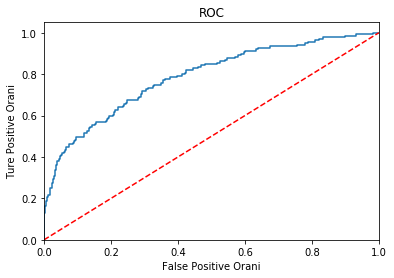

In [60]:
Results.LojPredict(X_train, y_train, X_test, y_test)


## ROC egrisi MinMax isleminden sonra onceki haline kiyasla daha iyi sonuc verdigini gorebiliyoruz

In [61]:
Results.LogitSelf(X_train, y_train, X_test, y_test)

This func job is if you given a TRESHOLD value it will use that and shows new results



Please enter any method for solver:  liblinear
Please enter TRESHOLD value:  0.25


Accuary :  0.9180436219431592
-------------------
Confusion Matrix: 
 [[1361   13]
 [ 111   28]]
-------------------
Details: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1374
           1       0.68      0.20      0.31       139

    accuracy                           0.92      1513
   macro avg       0.80      0.60      0.63      1513
weighted avg       0.90      0.92      0.90      1513



### Treshold 0.25 de iken bir nebze 1 tahmin sonucunda iyilesme oluyor